# Baseball Case Study 

**Problem Statement:**

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

**Input features:** Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

**Output:** Number of predicted wins (W)

Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Complete_Games , Shutouts, Saves, and Error

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split ,  cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import  ElasticNet
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler 
import warnings 
warnings.filterwarnings('ignore')

# Getting the Data

In [2]:
bdf = pd.read_csv('baseball.csv')
pd.set_option('display.max_rows', None)

In [3]:
bdf

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
bdf.shape

(30, 17)

In [5]:
bdf.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

*Renaming the columns*

In [6]:
bdf.columns = ['Wins' , 'Runs', 'At_Bats', 'Hits', 'Doubles', 
               'Triples', 'Homeruns', 'Walks', 'Strikeouts', 
               'Stolen_Bases', 'Runs_Allowed', 'Earned_Runs',
               'Earned_Run_Average_(ERA)', 'Complete_Games','Shutouts', 'Saves','Error']

In [7]:
bdf

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Games,Shutouts,Saves,Error
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


*Extracting information about the data*

In [8]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wins                      30 non-null     int64  
 1   Runs                      30 non-null     int64  
 2   At_Bats                   30 non-null     int64  
 3   Hits                      30 non-null     int64  
 4   Doubles                   30 non-null     int64  
 5   Triples                   30 non-null     int64  
 6   Homeruns                  30 non-null     int64  
 7   Walks                     30 non-null     int64  
 8   Strikeouts                30 non-null     int64  
 9   Stolen_Bases              30 non-null     int64  
 10  Runs_Allowed              30 non-null     int64  
 11  Earned_Runs               30 non-null     int64  
 12  Earned_Run_Average_(ERA)  30 non-null     float64
 13  Complete_Games            30 non-null     int64  
 14  Shutouts    

*Describing the dataset to obtain - Count , Mean , Standard deviation , Mininmum , IQR , Maximum values*

In [9]:
bdf.describe()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Games,Shutouts,Saves,Error
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Data Preprocessing

*Plotting a pairplot to see correlation between different features*

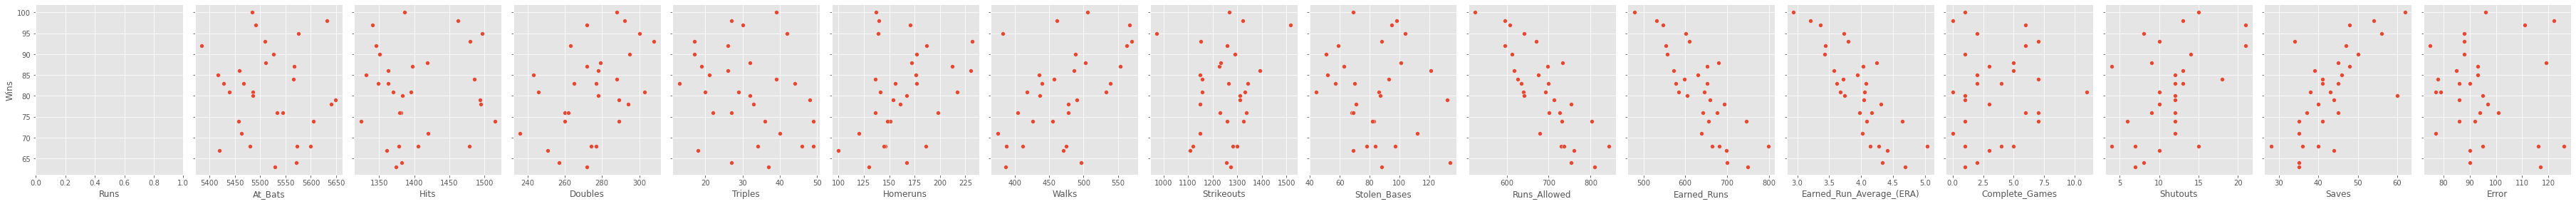

In [10]:
sns.pairplot(bdf, x_vars=['Runs', 'At_Bats', 'Hits', 'Doubles', 
               'Triples', 'Homeruns', 'Walks', 'Strikeouts', 
               'Stolen_Bases', 'Runs_Allowed', 'Earned_Runs',
               'Earned_Run_Average_(ERA)', 'Complete_Games','Shutouts', 'Saves','Error'], y_vars='Wins', height = 4 , aspect = 0.8);

*BARPLOT*

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.

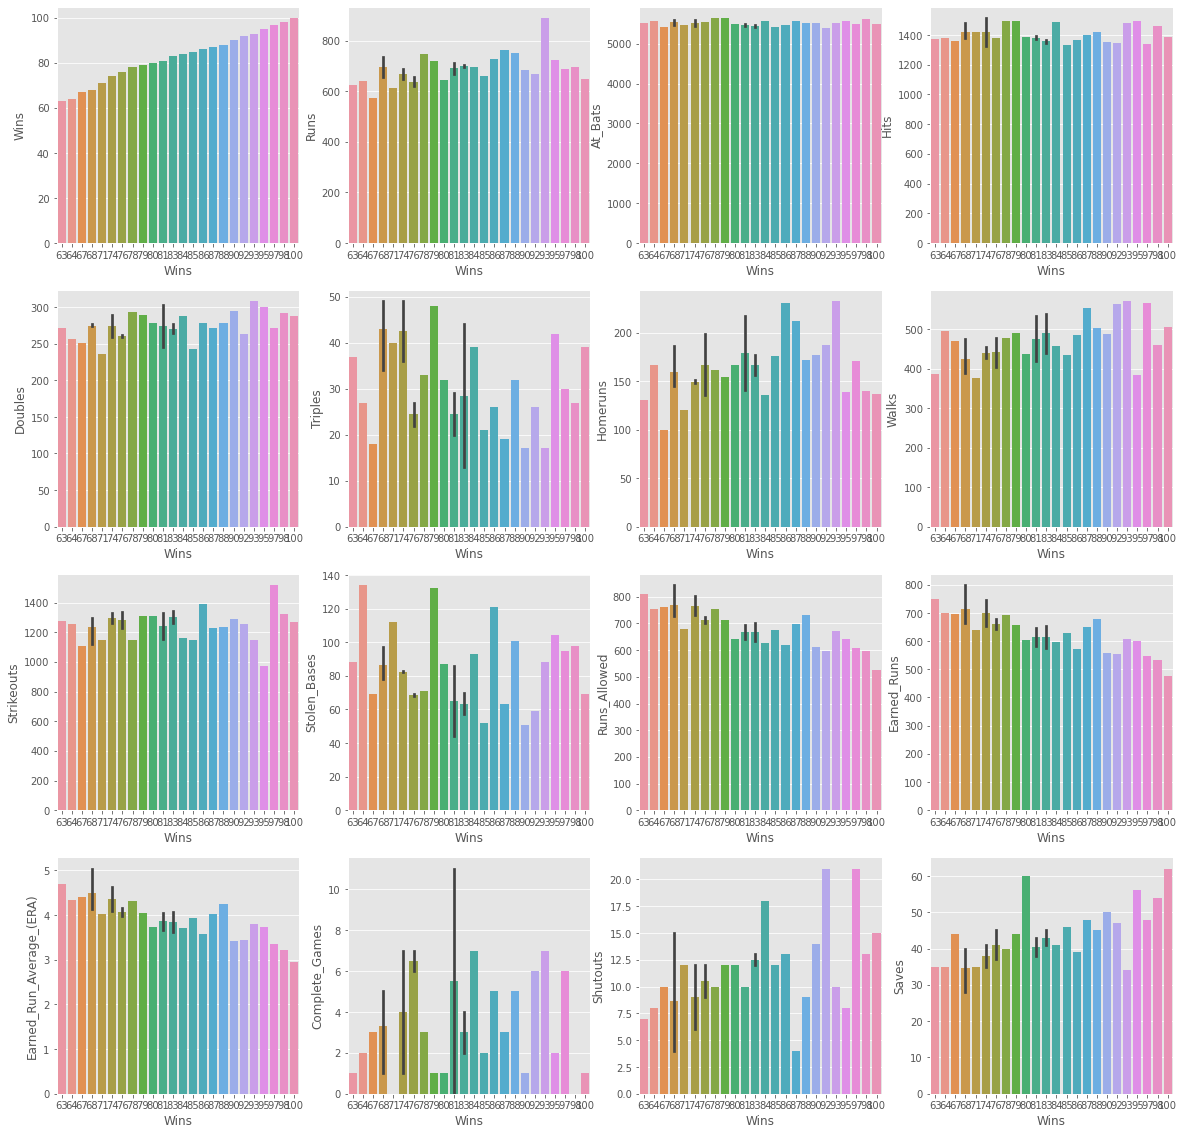

In [11]:
fig, ax1 = plt.subplots(4,4, figsize=(20 , 20))
k = 0
columns = list(bdf.columns)
for i in range(4):
    for j in range(4):
            sns.barplot(bdf['Wins'], bdf[columns[k]], ax = ax1[i][j])
            k += 1
plt.show()

*Plotting Boxplot for visualising Outliers*

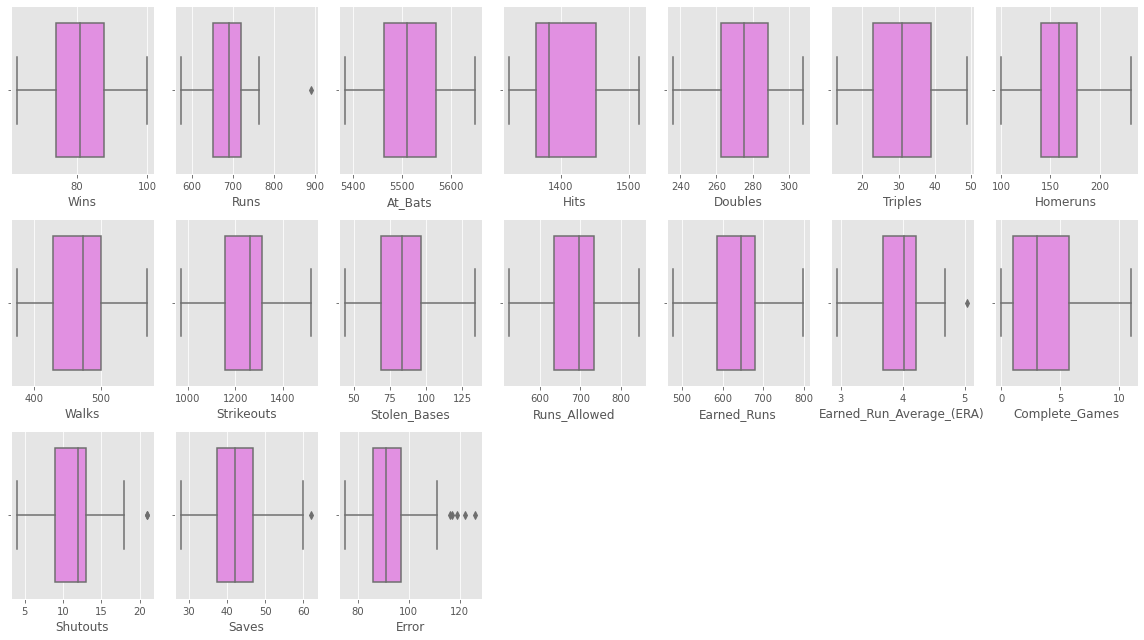

In [12]:
col=bdf.columns.values
ncol=7
nrows=3
plt.figure(figsize=(16,9))
for i in range (0,len(col)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(bdf[col[i]],color='violet',orient='v')
    plt.tight_layout()

In [13]:
bdf.describe()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Games,Shutouts,Saves,Error
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


*Finding Zscore for our data*

In [14]:
from scipy.stats import zscore
z_score = np.abs(zscore(bdf))

In [15]:
bdf.shape

(30, 17)

Here I have created two categories 

**bdf_wo** = bdf DataFrame without Outliers

**bdf_wio** = bdf DataFrame wit Outliers 

In [16]:
bdf_wo = bdf[(z_score<3).all(axis = 1)]
bdf_wo.shape

(29, 17)

From above we can observe that the shape of dataframe earlier wa (30,17) but now it is reduced to (29,17). So we successfully removed the outliers.

In [17]:
bdf_wio = bdf[(z_score>3).all(axis = 1)]
bdf_wio.shape

(0, 17)

In [18]:
bdf_wo

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Games,Shutouts,Saves,Error
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [19]:
for i in z_score:
    if z_score.all() > 3:
        print(i)

**Checking for correlation**

*LMPLOT*

This function combines regplot() and FacetGrid. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

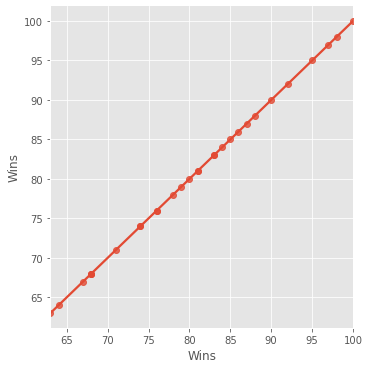

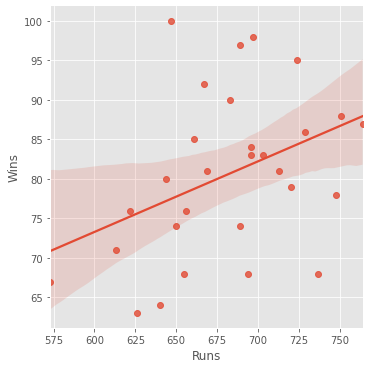

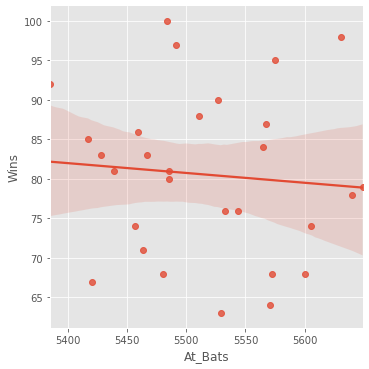

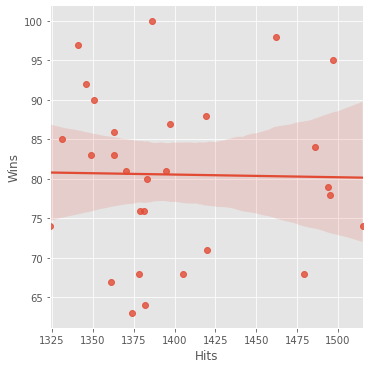

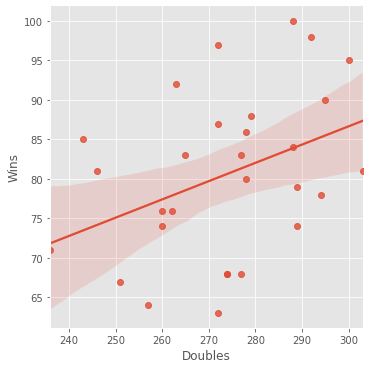

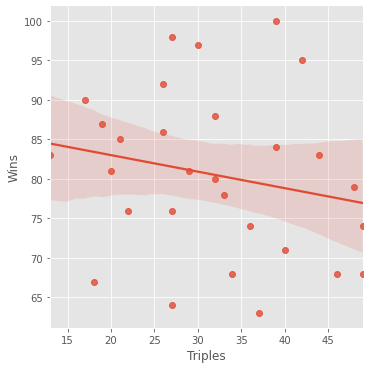

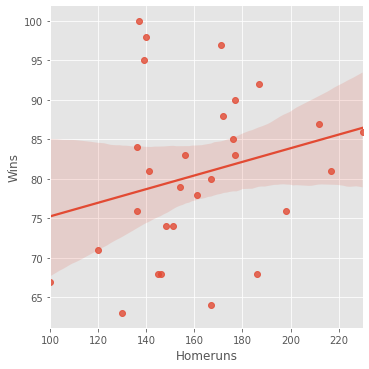

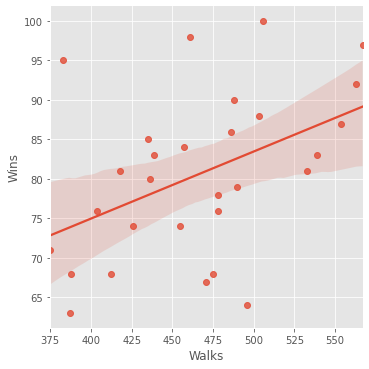

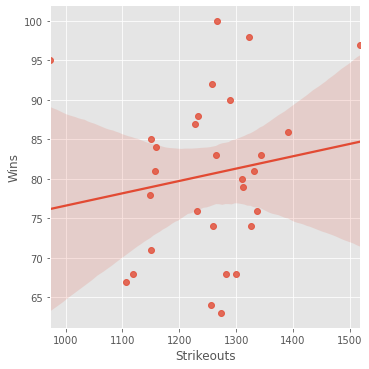

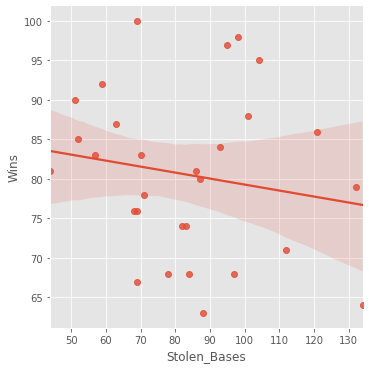

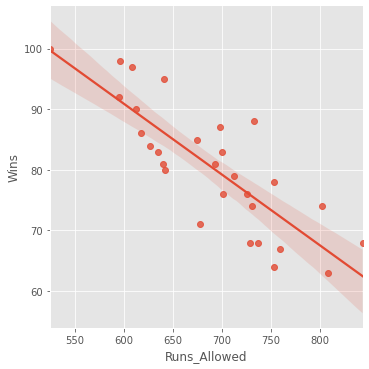

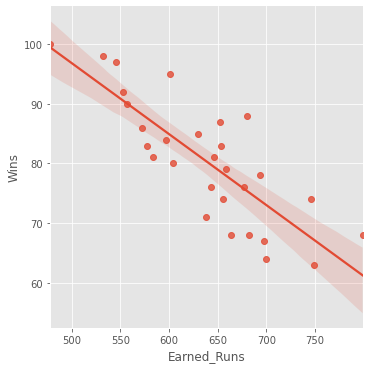

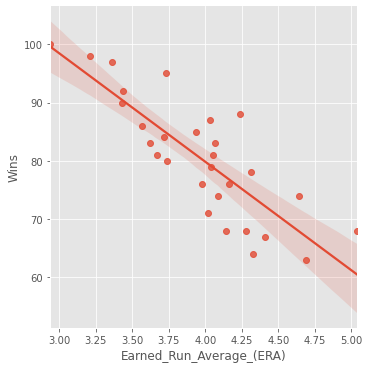

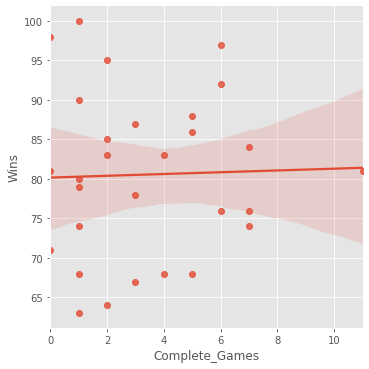

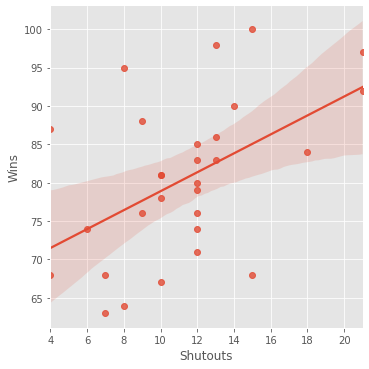

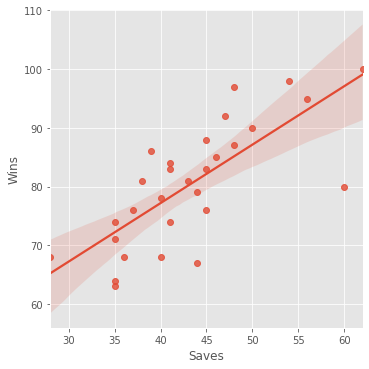

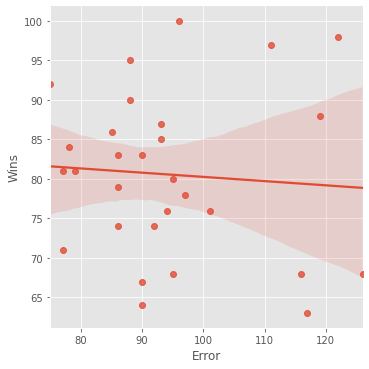

In [20]:
 for i in bdf_wo:
    sns.lmplot(x = i , y ='Wins' , data = bdf_wo , scatter = True)

In [21]:
corr_df = bdf_wo.corr()
corr_df  = corr_df.iloc[: , :1]
corr_df

,Wins
Wins,1.000000
Runs,0.390451
At_Bats,-0.085780
Hits,-0.018360
Doubles,0.384886
Triples,-0.206737
Homeruns,0.245697
Walks,0.447513
Strikeouts,0.156469
Stolen_Bases,-0.169503


*From above we can see that*

We can see that

Run is proportional to wins


At_bats is inversely proportional to wins


Hits is unaffected by Wins


Double is proportional to Wins


Triples is inversely proportional to Wins


Homeruns is proportional to Wins


Walks is proportional to wins


Srikeout is proportional to wins


Stolen_bases is proportional to Wins


Runs_allowed is inversely proportional to Wins


Earned_runs is inversely proportional to Wins 


earned_run_average is inversely proportional to Wins 


Wins is somewhat affected by complete Games


Wins is somewhat affected by shutouts


Wins is affected by Saves

<AxesSubplot:>

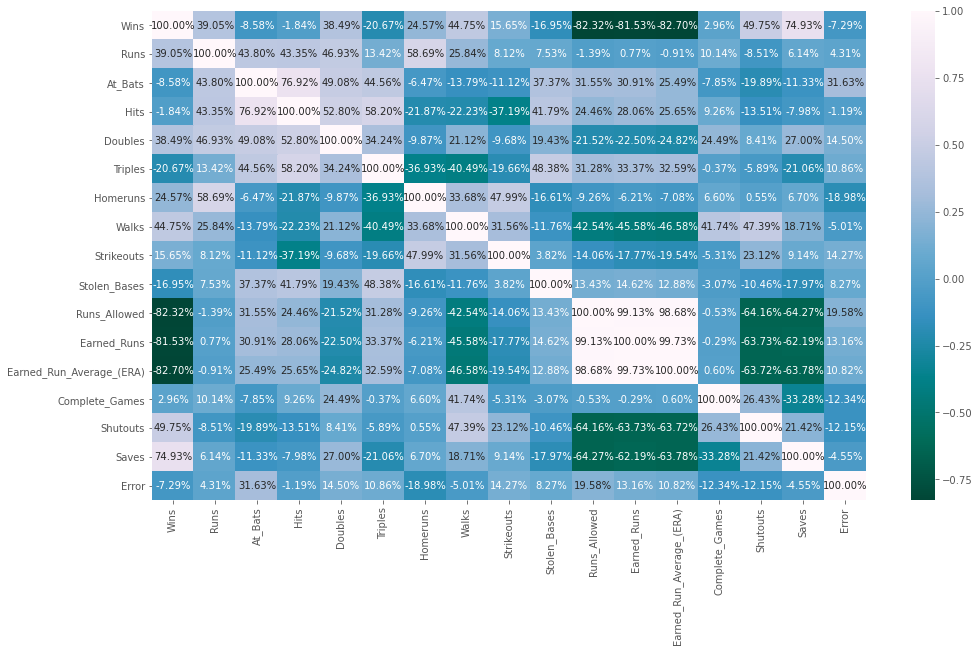

In [22]:
plt.figure(figsize = (16,9))
sns.heatmap(bdf_wo.corr() , annot = True , fmt = '.2%' , cmap = 'PuBuGn_r')

From bove we can see that Wins are not so much affected by Hits and Complete_Games (correlation is < 5%) , so we can drop Hits and Complete_Games column.


**Feature Selection**

In [23]:
to_drop = ['Hits' , 'Complete_Games']
bdf_wo = bdf_wo.drop(to_drop, axis = 1)

In [24]:
bdf_wo.shape

(29, 15)

In [25]:
bdf_wo.head()

,Wins,Runs,At_Bats,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Shutouts,Saves,Error
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,12,35,86


In [26]:
x = bdf_wo.drop('Wins', axis= 1)
x.head()

,Runs,At_Bats,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Shutouts,Saves,Error
0,724,5575,300,42,139,383,973,104,641,601,3.73,8,56,88
1,696,5467,277,44,156,439,1264,70,700,653,4.07,12,45,86
2,669,5439,303,29,141,533,1157,86,640,584,3.67,10,38,79
3,622,5533,260,27,136,404,1231,68,701,643,3.98,9,37,101
4,689,5605,289,49,151,455,1259,83,803,746,4.64,12,35,86


**Skewness**

*Checking for skewness and dealing with it*.

In [27]:
x.skew()

Runs                       -0.215364
At_Bats                     0.169573
Doubles                    -0.335304
Triples                     0.090124
Homeruns                    0.450862
Walks                       0.151193
Strikeouts                 -0.233815
Stolen_Bases                0.494966
Runs_Allowed                0.018155
Earned_Runs                 0.018461
Earned_Run_Average_(ERA)    0.016693
Shutouts                    0.526943
Saves                       0.627480
Error                       0.840271
dtype: float64

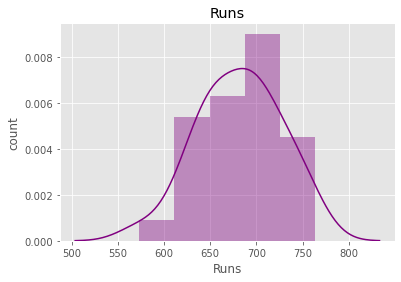

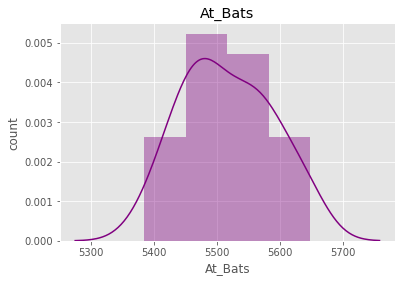

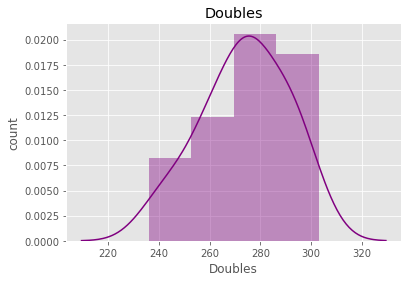

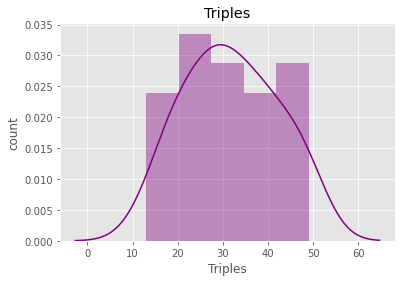

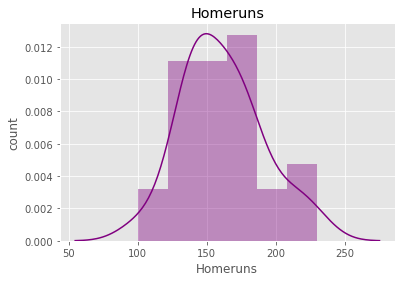

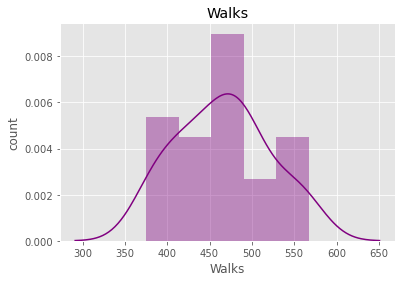

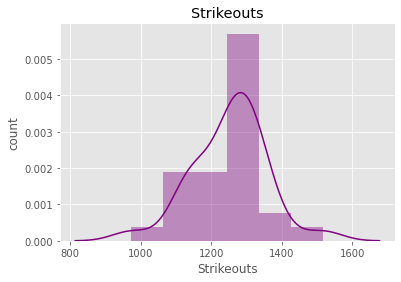

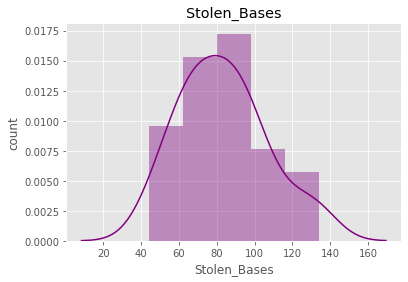

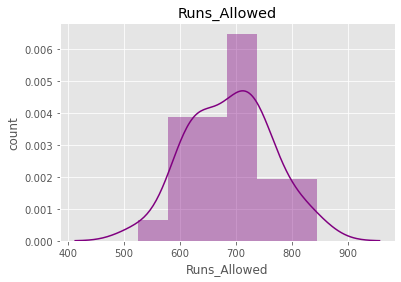

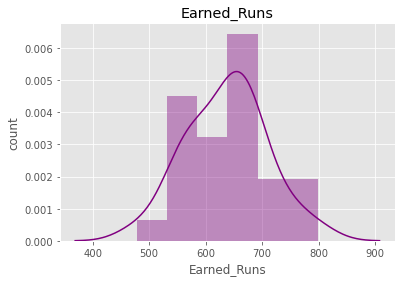

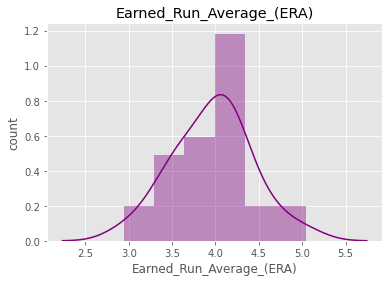

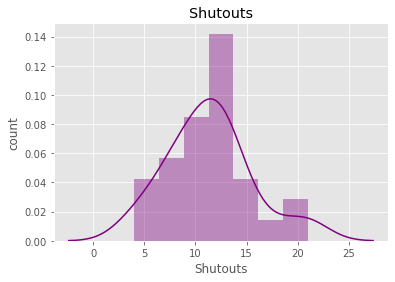

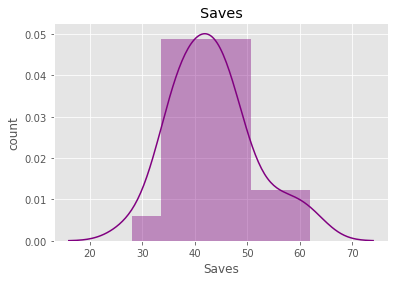

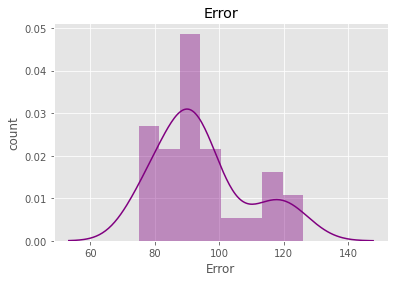

In [28]:
for feature in x :
    sns.distplot(x[feature] , kde = True , color = 'purple' )
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

The rule of thumb seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed

From above we can see that Saves & Errors are skewed so we need to deal with them.

In [29]:
columns = ['Saves' , 'Error']
for col in columns :
    x[col] = np.abs(np.log(x[col]))

In [30]:
x.skew()

Runs                       -0.215364
At_Bats                     0.169573
Doubles                    -0.335304
Triples                     0.090124
Homeruns                    0.450862
Walks                       0.151193
Strikeouts                 -0.233815
Stolen_Bases                0.494966
Runs_Allowed                0.018155
Earned_Runs                 0.018461
Earned_Run_Average_(ERA)    0.016693
Shutouts                    0.526943
Saves                       0.096752
Error                       0.583308
dtype: float64

The rule of thumb seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed

In [31]:
x.columns

Index(['Runs', 'At_Bats', 'Doubles', 'Triples', 'Homeruns', 'Walks',
       'Strikeouts', 'Stolen_Bases', 'Runs_Allowed', 'Earned_Runs',
       'Earned_Run_Average_(ERA)', 'Shutouts', 'Saves', 'Error'],
      dtype='object')

**Scaling the data**

In [32]:
for i in x :
    print(i , max(x[i]) - min(x[i]))

Runs 191
At_Bats 264
Doubles 67
Triples 36
Homeruns 130
Walks 192
Strikeouts 545
Stolen_Bases 90
Runs_Allowed 319
Earned_Runs 321
Earned_Run_Average_(ERA) 2.1
Shutouts 17
Saves 0.7949298748698879
Error 0.5187937934151678


So here we can see that there is so much difference between max and min values in this dataset . So we need to scale them.

**MinMax Scaler**

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [33]:
scaler = MinMaxScaler()
x_s = scaler.fit_transform(x)
x_sc = pd.DataFrame(x_s , columns = x.columns)

In [34]:
#Our dataframe is being scaled .
x_sc

,Runs,At_Bats,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Shutouts,Saves,Error
0,0.790576,0.719697,0.955224,0.805556,0.300000,0.041667,0.000000,0.666667,0.363636,0.383178,0.376190,0.235294,0.871960,0.308116
1,0.643979,0.310606,0.611940,0.861111,0.430769,0.333333,0.533945,0.288889,0.548589,0.545171,0.538095,0.470588,0.596855,0.263803
2,0.502618,0.204545,1.000000,0.444444,0.315385,0.822917,0.337615,0.466667,0.360502,0.330218,0.347619,0.352941,0.384162,0.100155
3,0.256545,0.560606,0.358209,0.388889,0.276923,0.151042,0.473394,0.266667,0.551724,0.514019,0.495238,0.294118,0.350614,0.573701
4,0.607330,0.833333,0.791045,1.000000,0.392308,0.416667,0.524771,0.433333,0.871473,0.834891,0.809524,0.470588,0.280708,0.263803
5,1.000000,0.689394,0.537313,0.166667,0.861538,0.932292,0.466055,0.211111,0.542320,0.542056,0.519048,0.000000,0.678043,0.414638
6,0.732984,0.378788,0.149254,0.194444,0.900000,0.223958,0.656881,0.000000,0.526646,0.523364,0.528571,0.352941,0.539665,0.050728
7,0.371728,0.378788,0.626866,0.527778,0.515385,0.317708,0.618349,0.477778,0.366771,0.392523,0.380952,0.470588,0.958751,0.455651
8,0.916230,0.965909,0.865672,0.555556,0.469231,0.536458,0.321101,0.300000,0.714734,0.672897,0.652381,0.352941,0.448687,0.495809
9,0.931937,0.477273,0.641791,0.527778,0.553846,0.666667,0.477064,0.633333,0.652038,0.629283,0.619048,0.294118,0.596855,0.889824


*PLotting heatmap to check for further correlatios*

<AxesSubplot:>

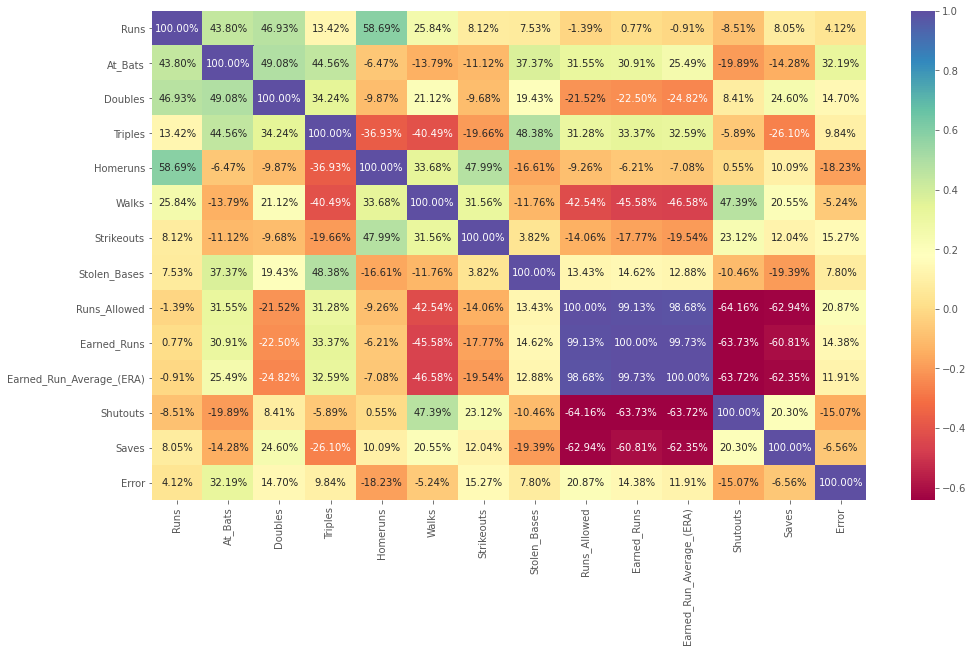

In [35]:
plt.figure(figsize=(16,9))
sns.heatmap(x_sc.corr() , annot = True , fmt = '.2%' , cmap = 'Spectral')

*From above we can see that columns like*

Runs_Allowed and Earned_runs

Runs_Allowed and Earned_Run_Average

Earned_Runs and Earned_Run_Average 

are highly correlated so we can apply **PCA** on this .



**PCA**

In [36]:
pca = PCA(n_components = 12)
xpca = pca.fit_transform(x_sc)

In [37]:
x_f = pd.DataFrame(xpca)

In [38]:
x_f

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.239057,-0.517903,-0.426157,-0.233499,0.635757,-0.163463,0.150722,-0.006052,0.186046,-0.123967,-0.114135,-0.027168
1,0.088202,0.020694,-0.146756,-0.220369,0.107485,0.059362,-0.282652,0.245972,-0.050425,-0.037068,0.021820,0.050680
2,-0.352671,-0.101363,-0.156261,-0.250824,0.036484,0.332196,0.397123,0.304998,0.112451,0.268326,0.044497,-0.030257
3,0.224897,0.366792,-0.201480,0.288419,0.096896,-0.003211,-0.015204,-0.223696,0.028474,0.157441,0.105201,-0.013286
4,0.692637,-0.241205,0.030586,-0.278252,-0.107470,0.346905,-0.168038,0.019136,-0.250670,0.064072,-0.002564,-0.011923
5,-0.185553,-0.069649,0.841803,-0.011638,0.291230,0.039687,0.257920,-0.003402,0.034335,-0.180769,0.210043,-0.036779
6,-0.198277,0.590768,0.442495,-0.298645,0.271620,-0.166740,-0.310291,-0.219312,-0.012271,0.048169,0.048063,0.052565
7,-0.238717,-0.013357,-0.227791,0.090119,0.159419,-0.308451,-0.051847,0.109745,-0.214375,-0.046866,-0.112570,-0.100019
8,0.367912,-0.399192,0.340583,-0.002548,0.243449,0.335329,0.032626,-0.148715,-0.007773,-0.019783,-0.044287,0.058672
9,0.203318,-0.273248,0.371718,0.273005,-0.075567,-0.070340,0.094275,0.251904,0.194096,-0.218240,-0.122033,0.073348


<AxesSubplot:>

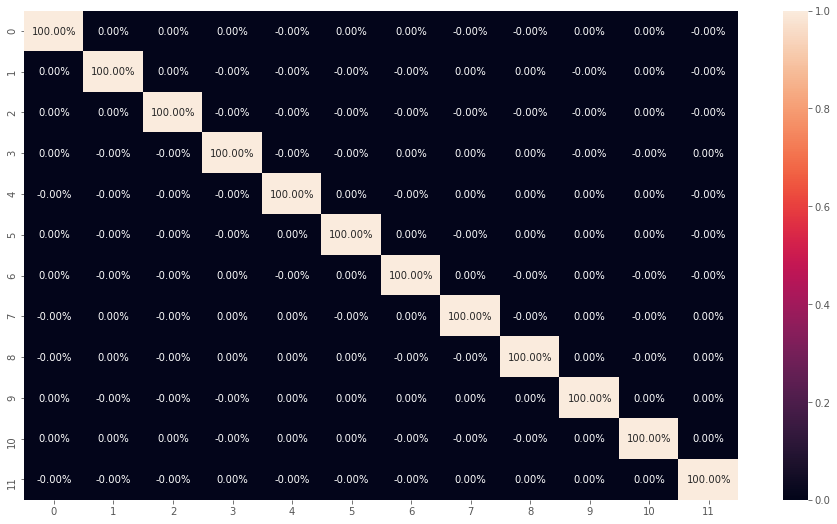

In [39]:
plt.figure(figsize = (16,9))
sns.heatmap(x_f.corr() , annot = True ,  fmt ='.2%')

Now we can see that the **correlation** in between the **predictor variable** is being removed properly.

In [40]:
y = bdf_wo['Wins']
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: Wins, dtype: int64

# Building Machine Learning Models

**Finding Best Random State**

In [41]:
best_score=0
for i in range(41):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x_f, y, test_size = 0.2, random_state = i)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_predicted = lr.predict(X_test)
    b_score= r2_score(y_test ,y_predicted )
    if b_score>best_score:
        best_score=b_score
        randomState=i
    
print('Best Score = {} For Random state = {}'.format(best_score*100,randomState))

Best Score = 91.9389691575307 For Random state = 15


**Applying Machine Learning Models**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x_f , y, train_size=0.7, test_size=0.3, random_state= 15)

model_reg = [LinearRegression,RandomForestRegressor, SVR, DecisionTreeRegressor,KNeighborsRegressor, GradientBoostingRegressor,
             ExtraTreeRegressor , Lasso , Ridge , ElasticNet]


for model in model_reg:
    m = model()
    print('\n''Model: ',m)
    m.fit(X_train, y_train)
    scr=m.score(X_train,y_train)
    score = (m.score(X_test , y_test))
    print('\n''-->''Score:',score)
    scr_cross=cross_val_score(m,x,y,cv=5)
    scr_mean=scr_cross.mean()
    print('Cross validation score: ',scr_mean)
    print('Difference between accuracy and cross validation score: ', scr-scr_mean)
    y_predicted = m.predict(X_test)
    print('Mean Absolute Error: ',mean_absolute_error(y_test, y_predicted))
    print('R2 Score' , r2_score(y_test , y_predicted))


Model:  LinearRegression()

-->Score: 0.8930405113479969
Cross validation score:  0.15824749250490866
Difference between accuracy and cross validation score:  0.7386812457879943
Mean Absolute Error:  3.382606772687344
R2 Score 0.8930405113479969

Model:  RandomForestRegressor()

-->Score: 0.33172971107839555
Cross validation score:  -0.6603999148971976
Difference between accuracy and cross validation score:  1.5148431068614832
Mean Absolute Error:  7.976666666666666
R2 Score 0.33172971107839555

Model:  SVR()

-->Score: 0.1053551270611951
Cross validation score:  -0.42866517254556075
Difference between accuracy and cross validation score:  0.6717415703316663
Mean Absolute Error:  8.770395222789888
R2 Score 0.1053551270611951

Model:  DecisionTreeRegressor()

-->Score: -0.07158630842841385
Cross validation score:  -2.1182953361267534
Difference between accuracy and cross validation score:  3.1182953361267534
Mean Absolute Error:  10.666666666666666
R2 Score -0.07158630842841385

Model:

In [43]:
best_score=0
for i in range(201):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x_f, y, test_size = 0.2, random_state = i)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_predicted = lr.predict(X_test)
    b_score= r2_score(y_test ,y_predicted )
    if b_score>best_score:
        best_score=b_score
        randomState=i
    
print('Best Score = {} For Random state = {}'.format(best_score*100,randomState))

Best Score = 94.95771589846336 For Random state = 104


**We will use these Algorithms to predict our regression problem.**

**Linear Regression**

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x_f, y, test_size = 0.2, random_state = 15)
    
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
print('The R2 score={}'.format(r2_score(y_test , lr_pred)*100))
print('The MSE ={}'.format(mean_squared_error(y_test , lr_pred)))
print('The MAE ={}'.format(mean_absolute_error(lr_pred , y_test)))
print('The RMSE ={}'.format(np.sqrt(mean_squared_error(lr_pred , y_test))))

The R2 score=91.9389691575307
The MSE =13.24696068445788
The MAE =3.0337882191269094
The RMSE =3.6396374385998778


In [ ]:
sns.regplot(y_test,lr_pred , scatter = True , label = True)

**Random Forest Regressor**

In [57]:
best_score=0
for i in range(201):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x_f, y, test_size = 0.2, random_state = i)
    rf = RandomForestRegressor()
    rf.fit(X_train,y_train)
    y_predicted = rf.predict(X_test)
    b_score= r2_score(y_test ,y_predicted )
    if b_score>best_score:
        best_score=b_score
        randomState=i
    
print('Best Score = {} For Random state = {}'.format(best_score*100,randomState))


Best Score = 82.1370930232558 For Random state = 115


In [45]:
X_train, X_test, y_train, y_test = train_test_split(x_f, y, test_size = 0.2, random_state = 115)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print('The R2 score={}'.format(r2_score(y_test, rf_pred)*100))
print('The MSE ={}'.format(mean_squared_error(y_test, rf_pred)))
print('The MAE ={}'.format(mean_absolute_error(y_test, rf_pred)))
print('The RMSE ={}'.format(np.sqrt(mean_squared_error(y_test, rf_pred))))

Best Score = 87.15834302325582 For Random state = 115
The R2 score=80.06491279069769
The MSE =7.619633333333328
The MAE =2.0633333333333326
The RMSE =2.7603683329101805


In [ ]:
sns.regplot(y_test, rf_pred , scatter = True , label = True)

**SVR**

In [46]:
best_score=0
for i in range(201):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x_f, y, test_size = 0.2, random_state = i)
    sv = SVR()
    sv.fit(X_train,y_train)
    y_predicted = sv.predict(X_test)
    b_score= r2_score(y_test ,y_predicted )
    if b_score>best_score:
        best_score=b_score
        randomState=i
        
print('Best Score = {} For Random state = {}'.format(best_score*100,randomState))

Best Score = 37.92232826654329 For Random state = 120


In [56]:
X_train, X_test, y_train, y_test = train_test_split(x_f, y, test_size = 0.2, random_state = 120)

sv = SVR()
sv.fit(X_train , y_train)
sv_pred = sv.predict(X_test)
print('The R2 score={}'.format(r2_score(y_test, sv_pred)*100))
print('The MSE ={}'.format(mean_squared_error(y_test, sv_pred)))
print('The MAE ={}'.format(mean_absolute_error(y_test, sv_pred)))
print('The RMSE ={}'.format(np.sqrt(mean_squared_error(y_test, sv_pred))))

The R2 score=37.92232826654329
The MSE =9.81172089342691
The MAE =2.7248343555587247
The RMSE =3.1323666601192954


In [ ]:
sns.regplot(y_test, sv_pred , scatter = True , label = True)

**Lasso Regression**

In [49]:
best_score=0
for i in range(201):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x_f, y, test_size = 0.2, random_state = i)
    ls = Lasso()
    ls.fit(X_train,y_train)
    y_predicted = ls.predict(X_test)
    b_score= r2_score(y_test ,y_predicted )
    if b_score>best_score:
        best_score=b_score
        randomState=i
        
print('Best Score = {} For Random state = {}'.format(best_score*100,randomState))

Best Score = 91.81919100523108 For Random state = 46


In [50]:
X_train, X_test, y_train, y_test = train_test_split(x_f, y, test_size = 0.2, random_state = 46)


ls = Lasso()
ls.fit(X_train , y_train)
ls_pred = ls.predict(X_test)
print('The R2 score={}'.format(r2_score(y_test, ls_pred)*100))
print('The MSE ={}'.format(mean_squared_error(y_test, ls_pred)))
print('The MAE ={}'.format(mean_absolute_error(y_test, ls_pred)))
print('The RMSE ={}'.format(np.sqrt(mean_squared_error(y_test, ls_pred))))

The R2 score=91.81919100523108
The MSE =4.9743863582081085
The MAE =1.7641457650173962
The RMSE =2.2303332392734743


In [ ]:
sns.regplot(y_test, ls_pred , scatter = True , label = True)

**Ridge Regression**

In [51]:
best_score=0
for i in range(201):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x_f, y, test_size = 0.2, random_state = i)
    rg = Ridge()
    rg.fit(X_train,y_train)
    y_predicted = rg.predict(X_test)
    b_score= r2_score(y_test ,y_predicted )
    if b_score>best_score:
        best_score=b_score
        randomState=i
        
print('Best Score = {} For Random state = {}'.format(best_score*100,randomState))

Best Score = 94.22256870010266 For Random state = 198


In [52]:
X_train, X_test, y_train, y_test = train_test_split(x_f, y, test_size = 0.2, random_state = 198)
rg = Ridge()
rg.fit(X_train , y_train)
rg_pred = rg.predict(X_test)
print('The R2 score={}'.format(r2_score(y_test, rg_pred)*100))
print('The MSE ={}'.format(mean_squared_error(y_test, rg_pred)))
print('The MAE ={}'.format(mean_absolute_error(y_test, rg_pred)))
print('The RMSE ={}'.format(np.sqrt(mean_squared_error(y_test, rg_pred))))

The R2 score=94.22256870010266
The MSE =8.19753307774322
The MAE =2.437108799931574
The RMSE =2.8631334369433814


In [ ]:
sns.regplot(y_test, rg_pred , scatter = True , label = True)

**Elastic Net Regression**

In [53]:
best_score=0
for i in range(201):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x_f, y, test_size = 0.2, random_state = i)
    elt = ElasticNet()
    elt.fit(X_train,y_train)
    y_predicted = elt.predict(X_test)
    b_score= r2_score(y_test ,y_predicted )
    if b_score>best_score:
        best_score=b_score
        randomState=i
        
print('Best Score = {} For Random state = {}'.format(best_score*100,randomState))

Best Score = 57.33693510008928 For Random state = 109


In [54]:
X_train, X_test, y_train, y_test = train_test_split(x_f, y, test_size = 0.2, random_state = 109)
elt = ElasticNet()
elt.fit(X_train , y_train)
elt_pred = elt.predict(X_test)
print('The R2 score={}'.format(r2_score(y_test, elt_pred)*100))
print('The MSE ={}'.format(mean_squared_error(y_test, elt_pred)))
print('The MAE ={}'.format(mean_absolute_error(y_test, elt_pred)))
print('The RMSE ={}'.format(np.sqrt(mean_squared_error(y_test, elt_pred))))

The R2 score=57.33693510008928
The MSE =8.4852095745378
The MAE =2.60079837647888
The RMSE =2.9129383059958203


In [ ]:
sns.regplot(y_test, elt_pred , scatter = True , label = True)

From above we have observed that **Ridge Regression** is the best model for our predictions of this model .

In [55]:
import joblib
joblib.dump(rg,'Ridge.pkl')

['Ridge.pkl']